# Exercise 4.10

### Contents

1. Dealing with PII Data Security Issues
2. Creating Geographical Region Column
3. Excluding Low-Activity Customers 
4. Profiling Variables
5. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure
	a. For the usage frequency
	b. For customer expenditures
6. Comparing Customer Profiles, Departments, and Regions
7. Additional Visualization to answer key questions

## Importing libraries and Data

In [1]:
#Importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#Importing new customer data
path1 = r'/Users/elysegross/Documents/Data Analytics/A4 - Instacart Basket Analysis/'
df_ords_prods_merged = pd.read_pickle(os.path.join(path1, '02 Data', 'Prepared Data', 'data_merged.pkl'))
data_dictionary_prods = pd.read_csv(os.path.join(path1, '02 Data', 'Prepared Data', 'data_dictionary.csv'))

## Dealing with PII Data Security issues

There is PII data - the data contains names. To remedy this, I will drop the First Name and Last Name columns.

In [3]:
df_ords_prods_merged = df_ords_prods_merged.drop(columns = ['First Name', 'Last Name'])

## Creating Geographical Region Column

In [4]:
df_ords_prods_merged.head()

,Unnamed: 0_x,Unnamed: 0.1,order_id,user_id,order_number,orders_day_of_week,order_hour,days_since_prior_order,product_id,add_to_cart_order,...,median_days_since_prior_order,spending_flag,Gender,State,Age,Date Joined,Number of Dependants,Married?,Income,customers_merge
0,0,0,2539329,1,1,2,8,11.11484,196,1,...,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both
1,1,1,2398795,1,2,3,7,15.00000,196,1,...,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both
2,2,2,473747,1,3,3,12,21.00000,196,1,...,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both
3,3,3,2254736,1,4,4,7,29.00000,196,1,...,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both
4,4,4,431534,1,5,4,15,28.00000,196,1,...,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both


In [5]:
#Creating lists for each region

list_reg1 = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
list_reg2 = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']
list_reg3 = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']
list_reg4 = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [6]:
# Creating the regional labels in the column

df_ords_prods_merged.loc[df_ords_prods_merged['State'].isin(list_reg1), 'Region'] = 'Region 1 - Northeast'
df_ords_prods_merged.loc[df_ords_prods_merged['State'].isin(list_reg2) , 'Region'] = 'Region 2 - Midwest'
df_ords_prods_merged.loc[df_ords_prods_merged['State'].isin(list_reg3) , 'Region'] = 'Region 3 - South'
df_ords_prods_merged.loc[df_ords_prods_merged['State'].isin(list_reg4), 'Region'] = 'Region  4 - West'




In [7]:
#Viewing the dataframe to see if the above worked

df_ords_prods_merged.head()

,Unnamed: 0_x,Unnamed: 0.1,order_id,user_id,order_number,orders_day_of_week,order_hour,days_since_prior_order,product_id,add_to_cart_order,...,spending_flag,Gender,State,Age,Date Joined,Number of Dependants,Married?,Income,customers_merge,Region
0,0,0,2539329,1,1,2,8,11.11484,196,1,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both,Region 3 - South
1,1,1,2398795,1,2,3,7,15.00000,196,1,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both,Region 3 - South
2,2,2,473747,1,3,3,12,21.00000,196,1,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both,Region 3 - South
3,3,3,2254736,1,4,4,7,29.00000,196,1,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both,Region 3 - South
4,4,4,431534,1,5,4,15,28.00000,196,1,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both,Region 3 - South


In [8]:
#Viewing columns to see what the spending habits 
    #column was labeled to use for crosstab below.

df_ords_prods_merged.columns

Index(['Unnamed: 0_x', 'Unnamed: 0.1', 'order_id', 'user_id', 'order_number',
       'orders_day_of_week', 'order_hour', 'days_since_prior_order',
       'product_id', 'add_to_cart_order', 'reordered', 'Unnamed: 0_y',
       'product_name', 'aisle_id', 'department_id', 'prices', '_merge',
       'price_range_loc', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'price_means',
       'spender_type', 'median_days_since_prior_order', 'spending_flag',
       'Gender', 'State', 'Age', 'Date Joined', 'Number of Dependants',
       'Married?', 'Income', 'customers_merge', 'Region'],
      dtype='object')

In [9]:
#Creating a crosstab to see if spending habits differ by region

crosstab = pd.crosstab(df_ords_prods_merged['Region'], df_ords_prods_merged['spender_type'], dropna = False)


In [10]:
#Viewing our crosstab

crosstab

spender_type,High Spender,Low Spender
Region,,
Region 4 - West,5226463,3073678
Region 1 - Northeast,3613239,2114905
Region 2 - Midwest,4735298,2868252
Region 3 - South,6774935,4026260


We see that the West and South regions have more High Spenders but also more Low Spenders - this means they just have more spenders in general. In general, every region has mor High Spenders than Low Spenders

## Excluding Low-Activity Customers

In [11]:
# Viewing only the columns we want to see to see which will give us number of orders info.

df_ords_prods_merged[['user_id', 'price_means', 'spender_type']].head(10)

,user_id,price_means,spender_type
0,1,5.813559,Low Spender
1,1,5.813559,Low Spender
2,1,5.813559,Low Spender
3,1,5.813559,Low Spender
4,1,5.813559,Low Spender
5,1,5.813559,Low Spender
6,1,5.813559,Low Spender
7,1,5.813559,Low Spender
8,1,5.813559,Low Spender
9,1,5.813559,Low Spender


In [12]:
# Making a variable for number of orders of each customer

df_ords_prods_merged['total_customer_orders_count']=df_ords_prods_merged.groupby(['user_id']).user_id.transform('count')

In [13]:
df_ords_prods_merged.head()

,Unnamed: 0_x,Unnamed: 0.1,order_id,user_id,order_number,orders_day_of_week,order_hour,days_since_prior_order,product_id,add_to_cart_order,...,Gender,State,Age,Date Joined,Number of Dependants,Married?,Income,customers_merge,Region,total_customer_orders_count
0,0,0,2539329,1,1,2,8,11.11484,196,1,...,Female,Alabama,31,2/17/2019,3,married,40423,both,Region 3 - South,59
1,1,1,2398795,1,2,3,7,15.00000,196,1,...,Female,Alabama,31,2/17/2019,3,married,40423,both,Region 3 - South,59
2,2,2,473747,1,3,3,12,21.00000,196,1,...,Female,Alabama,31,2/17/2019,3,married,40423,both,Region 3 - South,59
3,3,3,2254736,1,4,4,7,29.00000,196,1,...,Female,Alabama,31,2/17/2019,3,married,40423,both,Region 3 - South,59
4,4,4,431534,1,5,4,15,28.00000,196,1,...,Female,Alabama,31,2/17/2019,3,married,40423,both,Region 3 - South,59


In [14]:
#Making the exclusion flag - count instances of times user_id in dataframe. Less than 5 is low activity
results=[]
for total in df_ords_prods_merged['total_customer_orders_count']:
    if total < 5:
        results.append('Low Activity')
    else:
        results.append('Regular Activity')

In [15]:
# Adding the above as a column in the df
df_ords_prods_merged['activity_flag']=results

In [16]:
# Count how many low activity customers there are
df_ords_prods_merged['activity_flag'].value_counts(dropna=False)

Regular Activity    32430155
Low Activity            2875
Name: activity_flag, dtype: int64

In [17]:
# Making a subset with just low activity customers
low_activity_customers= df_ords_prods_merged[df_ords_prods_merged['activity_flag']=='Low Activity']

In [18]:
# Confirming results above worked
low_activity_customers.shape

#It did since the count is the same as the previous count of low activity customers

(2875, 38)

In [19]:
# Export the above dataframe
low_activity_customers.to_pickle(os.path.join(path1, '02 Data', 'Prepared Data', 'low_activity_customers.pkl'))

In [20]:
# Excluding the low activity customers from the dataframe
df_ords_prods_merged.drop(df_ords_prods_merged[df_ords_prods_merged['activity_flag']=='Low Activity'].index, inplace=True)

In [21]:
# Confirm the above worked
df_ords_prods_merged['activity_flag'].value_counts()

Regular Activity    32430155
Name: activity_flag, dtype: int64

## Profiling Variables

Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

The different categories will be as below:

Single Young Person (age under 30) , No kids
Single Adult (age over 30), No kids
Single Young (age under 30) Parent
Married Young (ager under 30)Parent
Married Adult (age over 30) Parent
Married Adult (age over 30), no kids

In [22]:
#View columns to determine which columns will help us find the different criteria

df_ords_prods_merged.columns

Index(['Unnamed: 0_x', 'Unnamed: 0.1', 'order_id', 'user_id', 'order_number',
       'orders_day_of_week', 'order_hour', 'days_since_prior_order',
       'product_id', 'add_to_cart_order', 'reordered', 'Unnamed: 0_y',
       'product_name', 'aisle_id', 'department_id', 'prices', '_merge',
       'price_range_loc', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'price_means',
       'spender_type', 'median_days_since_prior_order', 'spending_flag',
       'Gender', 'State', 'Age', 'Date Joined', 'Number of Dependants',
       'Married?', 'Income', 'customers_merge', 'Region',
       'total_customer_orders_count', 'activity_flag'],
      dtype='object')

In [23]:
df_ords_prods_merged[['user_id', 'Age', 'Number of Dependants', 'Married?']].head(5)

,user_id,Age,Number of Dependants,Married?
0,1,31,3,married
1,1,31,3,married
2,1,31,3,married
3,1,31,3,married
4,1,31,3,married


In [24]:
# Creating profiling variable column

df_ords_prods_merged.loc[(df_ords_prods_merged['Age'] < 30) & (df_ords_prods_merged['Number of Dependants'] == 0) & (df_ords_prods_merged['Married?'] == 'single'), 'profiling variable'] = 'Single Young Person, No Kids'
df_ords_prods_merged.loc[(df_ords_prods_merged['Age'] >= 30) & (df_ords_prods_merged['Number of Dependants'] == 0) & (df_ords_prods_merged['Married?'] == 'single'), 'profiling variable'] = 'Single Adult Person, No Kids'
df_ords_prods_merged.loc[(df_ords_prods_merged['Age'] < 30) & (df_ords_prods_merged['Number of Dependants'] > 0) & (df_ords_prods_merged['Married?'] == 'single'), 'profiling variable'] = 'Single Young Parent'
df_ords_prods_merged.loc[(df_ords_prods_merged['Age'] < 30) & (df_ords_prods_merged['Number of Dependants'] > 0) & (df_ords_prods_merged['Married?'] == 'married'), 'profiling variable'] = 'Married Young Parent'
df_ords_prods_merged.loc[(df_ords_prods_merged['Age'] >= 30) & (df_ords_prods_merged['Number of Dependants'] > 0) & (df_ords_prods_merged['Married?'] == 'married'), 'profiling variable'] = 'Married Adult Parent'
df_ords_prods_merged.loc[(df_ords_prods_merged['Age'] >= 30) & (df_ords_prods_merged['Number of Dependants'] == 0) & (df_ords_prods_merged['Married?'] == 'married'), 'profiling variable'] = 'Married Adult, No Kids'
df_ords_prods_merged.loc[(df_ords_prods_merged['Age'] >= 30) & (df_ords_prods_merged['Number of Dependants'] == 0) & (df_ords_prods_merged['Married?'] == 'divorced/widowed'), 'profiling variable'] = 'Divorced or Widowed Adult'




In [25]:
#Checking to see if it was done correctly

df_ords_prods_merged[['user_id', 'Age', 'Number of Dependants', 'Married?', 'profiling variable']].head(60)

,user_id,Age,Number of Dependants,Married?,profiling variable
0,1,31,3,married,Married Adult Parent
1,1,31,3,married,Married Adult Parent
2,1,31,3,married,Married Adult Parent
3,1,31,3,married,Married Adult Parent
4,1,31,3,married,Married Adult Parent
5,1,31,3,married,Married Adult Parent
6,1,31,3,married,Married Adult Parent
7,1,31,3,married,Married Adult Parent
8,1,31,3,married,Married Adult Parent
9,1,31,3,married,Married Adult Parent


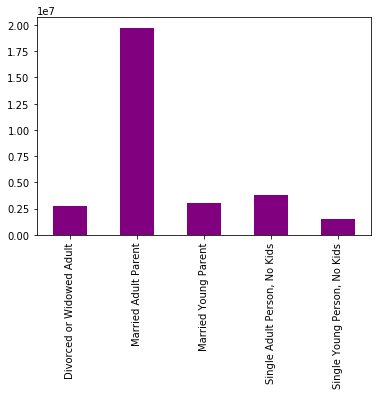

In [26]:
# Creating a bar chart to visualize the above

bar = df_ords_prods_merged['profiling variable'].value_counts().sort_index().plot.bar(color = ['purple'])


In [27]:
#Export bar chart outside jupyter notebook

bar.figure.savefig(os.path.join(path1, '04 Analysis','Visualizations', 'bar_profiling_variable.png'))

## Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

Usage Frequency: use column 'median_days_since_prior_order'

Expenditure: use column new 'prices_sum'

### For the usage frequency (using 'median_days_since_prior_order' column)

In [28]:
#Aggregate max of usage-frquency for customer profile types
df_ords_prods_merged.groupby('profiling variable').agg({'median_days_since_prior_order': ['max']})


,median_days_since_prior_order
,max
profiling variable,
Divorced or Widowed Adult,30.0
Married Adult Parent,30.0
Married Young Parent,30.0
"Single Adult Person, No Kids",30.0
"Single Young Person, No Kids",30.0


The above shows us that the max median days since last order is the same in every column. This makes me think there is consistency in this and it is not affected by customer type.

In [29]:
#Aggregate mean of usage-frquency for customer profile types
df_ords_prods_merged.groupby('profiling variable').agg({'median_days_since_prior_order': ['mean']})


,median_days_since_prior_order
,mean
profiling variable,
Divorced or Widowed Adult,9.954159
Married Adult Parent,10.046467
Married Young Parent,10.040538
"Single Adult Person, No Kids",9.987358
"Single Young Person, No Kids",10.084245


Like the max, we do not see great variation in the different customer profiles for the mean. 

In [30]:
#Aggregate min of usage-frquency for customer profile types
df_ords_prods_merged.groupby('profiling variable').agg({'median_days_since_prior_order': ['min']})


,median_days_since_prior_order
,min
profiling variable,
Divorced or Widowed Adult,0.0
Married Adult Parent,0.0
Married Young Parent,0.0
"Single Adult Person, No Kids",0.0
"Single Young Person, No Kids",0.0


Here we see there are people who have 0 days between orders as their median for each customer. 

Overall, the results are not different for each customer profile type.

In [31]:
#Visualize the above?

### For customer expenditures (using new 'prices_sum' column)

In [32]:
#Add a column with the sum of prices to show how much they have spend over time (expenditure)

df_ords_prods_merged['prices_sum'] = df_ords_prods_merged.groupby(['user_id'])['prices'].transform(np.sum)

In [33]:
#Viewing to make sure the above worked

df_ords_prods_merged.head()

,Unnamed: 0_x,Unnamed: 0.1,order_id,user_id,order_number,orders_day_of_week,order_hour,days_since_prior_order,product_id,add_to_cart_order,...,Date Joined,Number of Dependants,Married?,Income,customers_merge,Region,total_customer_orders_count,activity_flag,profiling variable,prices_sum
0,0,0,2539329,1,1,2,8,11.11484,196,1,...,2/17/2019,3,married,40423,both,Region 3 - South,59,Regular Activity,Married Adult Parent,375.7
1,1,1,2398795,1,2,3,7,15.00000,196,1,...,2/17/2019,3,married,40423,both,Region 3 - South,59,Regular Activity,Married Adult Parent,375.7
2,2,2,473747,1,3,3,12,21.00000,196,1,...,2/17/2019,3,married,40423,both,Region 3 - South,59,Regular Activity,Married Adult Parent,375.7
3,3,3,2254736,1,4,4,7,29.00000,196,1,...,2/17/2019,3,married,40423,both,Region 3 - South,59,Regular Activity,Married Adult Parent,375.7
4,4,4,431534,1,5,4,15,28.00000,196,1,...,2/17/2019,3,married,40423,both,Region 3 - South,59,Regular Activity,Married Adult Parent,375.7


In [34]:
#Aggregate max of usage-frquency for customer profile types
df_ords_prods_merged.groupby('profiling variable').agg({'prices_sum': ['max']})

,prices_sum
,max
profiling variable,
Divorced or Widowed Adult,800423.2
Married Adult Parent,1409778.9
Married Young Parent,2104114.1
"Single Adult Person, No Kids",1302311.8
"Single Young Person, No Kids",2101976.9


We see that the Married Young Parents spend the most as the overall max but all of the customer types have similarly high max values.

In [35]:
#Aggregate mean of usage-frquency for customer profile types
df_ords_prods_merged.groupby('profiling variable').agg({'prices_sum': ['mean']})

,prices_sum
,mean
profiling variable,
Divorced or Widowed Adult,4369.719242
Married Adult Parent,4704.818188
Married Young Parent,5208.006957
"Single Adult Person, No Kids",4766.986693
"Single Young Person, No Kids",4451.972708


The means are not that different but we do see a substaintally higher spending mean for Married Young Parents. Single young people and divorced and widowed people spend the least, which makes sense since they are feeding less mouths.

In [36]:
#Aggregate min of usage-frquency for customer profile types
df_ords_prods_merged.groupby('profiling variable').agg({'price_means': ['min']})

,price_means
,min
profiling variable,
Divorced or Widowed Adult,1.214286
Married Adult Parent,1.100000
Married Young Parent,1.120000
"Single Adult Person, No Kids",1.200000
"Single Young Person, No Kids",1.214286


All of the customer types have similarly low price minimums, which makes sense for those that have only bought one item.

## Comparing Customer Profiles, Departments, and Regions

Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

In [37]:
#Looking at department, Region, and Profiles

df_compare = df_ords_prods_merged[['user_id', 'department_id', 'Region', 'profiling variable']]

df_compare.head()

,user_id,department_id,Region,profiling variable
0,1,7,Region 3 - South,Married Adult Parent
1,1,7,Region 3 - South,Married Adult Parent
2,1,7,Region 3 - South,Married Adult Parent
3,1,7,Region 3 - South,Married Adult Parent
4,1,7,Region 3 - South,Married Adult Parent


In [38]:
#Creating dataframes for each region

df_region_1 = df_ords_prods_merged.loc[df_ords_prods_merged['Region'] == 'Region 1 - Northeast']
df_region_2 = df_ords_prods_merged.loc[df_ords_prods_merged['Region'] == 'Region 2 - Midwest']
df_region_3 = df_ords_prods_merged.loc[df_ords_prods_merged['Region'] == 'Region 3 - South']
df_region_4 = df_ords_prods_merged.loc[df_ords_prods_merged['Region'] == 'Region  4 - West']

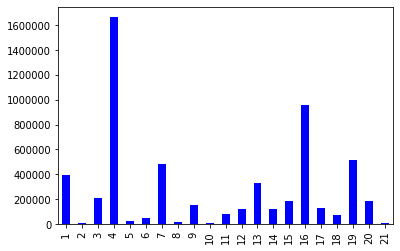

In [39]:
#Bar Chart of Departments for Region 1
bar_region_1_dep = df_region_1['department_id'].value_counts().sort_index().plot.bar(color = ['blue'])

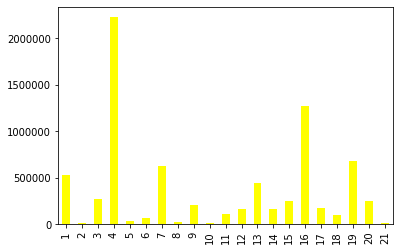

In [40]:
#Bar Chart of Departments for Region 2
bar_region_2_dep = df_region_2['department_id'].value_counts().sort_index().plot.bar(color = ['yellow'])

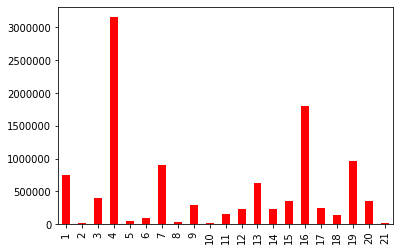

In [41]:
#Bar Chart of Departments for Region 3
bar_region_3_dep = df_region_3['department_id'].value_counts().sort_index().plot.bar(color = ['red'])

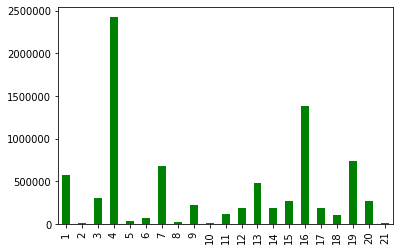

In [42]:
#Bar Chart of Departments for Region 4
bar_region_4_dep = df_region_4['department_id'].value_counts().sort_index().plot.bar(color = ['green'])

In [43]:
#Key to the above labels on x axes
data_dictionary_prods

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


The bar charts above show us that the departments bought from does not vary that much accross region. All buy the most from produce and household goods. 

Doing an analysis of departments per profile types.

In [44]:
#Creating dataframes for each customer profile

df_divorced = df_ords_prods_merged.loc[df_ords_prods_merged['profiling variable'] == 'Divorced or Widowed Adult']
df_married_adult_parent = df_ords_prods_merged.loc[df_ords_prods_merged['profiling variable'] == 'Married Adult Parent']
df_married_young_parent = df_ords_prods_merged.loc[df_ords_prods_merged['profiling variable'] == 'Married Young Parent']
df_single_young_nokids = df_ords_prods_merged.loc[df_ords_prods_merged['profiling variable'] == 'Single Young Person, No Kids']
df_single_young_parent = df_ords_prods_merged.loc[df_ords_prods_merged['profiling variable'] == 'Single Young Parent']
df_married_adult_nokids = df_ords_prods_merged.loc[df_ords_prods_merged['profiling variable'] =='Married Adult, No Kids']
df_single_adult_nokids = df_ords_prods_merged.loc[df_ords_prods_merged['profiling variable'] =='Single Adult Person, No Kids']

In [45]:
#make bar charts for each and you should be good to go

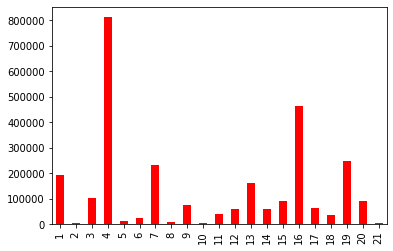

In [46]:
#bar chart for Divorced or Widowed people and Departments
bar_divorced = df_divorced['department_id'].value_counts().sort_index().plot.bar(color = ['red'])

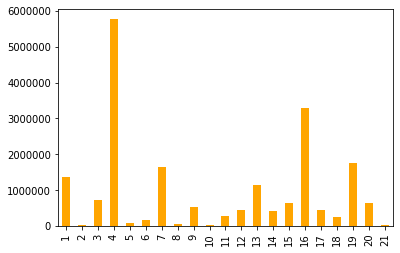

In [47]:
#bar chart for Married Adult Parents and Departments
bar_married_adult_parent = df_married_adult_parent['department_id'].value_counts().sort_index().plot.bar(color = ['orange'])

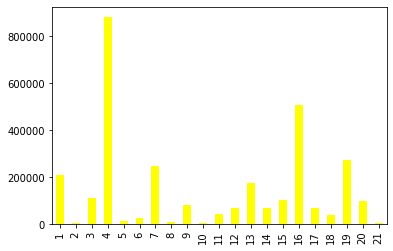

In [48]:
#bar chart for Married Young Parents and Departments 
bar_married_young_parent = df_married_young_parent['department_id'].value_counts().sort_index().plot.bar(color = ['yellow'])

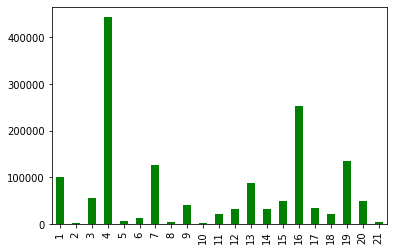

In [49]:
#bar chart for Single Young People and Departments 
bar_single_young_nokids = df_single_young_nokids['department_id'].value_counts().sort_index().plot.bar(color = ['green'])

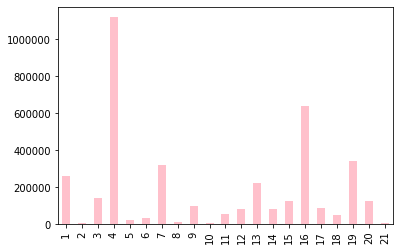

In [50]:
#bar chart for Married Adults without Kids at home and Departments 
bar_single_adult_nokids = df_single_adult_nokids['department_id'].value_counts().sort_index().plot.bar(color = ['pink'])


The purchases are not significantly different by profile type.

In [51]:
#Export line chart outside jupyter notebook

bar_region_1_dep.figure.savefig(os.path.join(path1, '04 Analysis','Visualizations', 'bar_region_profile_dep.png'))

## Additional Visualizations to answer key questions

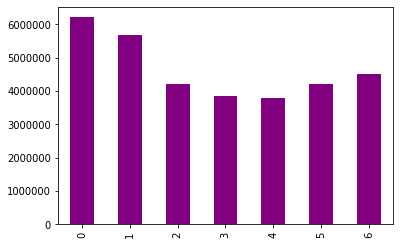

In [52]:
#Create a bar chart to see what day has the most orders

order_day_bar = df_ords_prods_merged['orders_day_of_week'].value_counts().sort_index().plot.bar(color = ['purple'])


In [53]:
#Export line chart outside jupyter notebook

order_day_bar.figure.savefig(os.path.join(path1, '04 Analysis','Visualizations', 'bar_order_day.png'))

### Loyalty and Departments

In [54]:
df_ords_prods_merged[['loyalty_flag', 'department_id']].head(50)

,loyalty_flag,department_id
0,New customer,7
1,New customer,7
2,New customer,7
3,New customer,7
4,New customer,7
5,New customer,7
6,New customer,7
7,New customer,7
8,New customer,7
9,New customer,7
